LE-NET network architecture in keras

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #to open the data, implements serialization
import random

In [24]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [25]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [26]:
x_train.shape

(34799, 32, 32, 3)

36

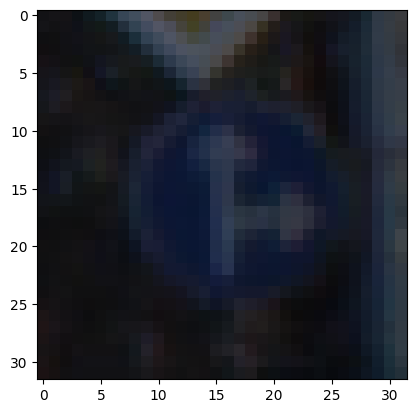

In [27]:
i = 1000
plt.imshow(x_train[i])
y_train[i]

In [28]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [29]:
#color to gray scale
x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_valid_gray = np.sum(x_validation/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)

In [30]:
x_train_gray.shape

(34799, 32, 32, 1)

In [31]:
x_valid_gray.shape

(4410, 32, 32, 1)

In [32]:
x_test_gray.shape

(12630, 32, 32, 1)

In [33]:
#normalize values
x_train_gray_norm =  (x_train_gray - 128) / 128
x_test_gray_norm =  (x_test_gray - 128) / 128
x_valid_gray_norm =  (x_valid_gray - 128) / 128

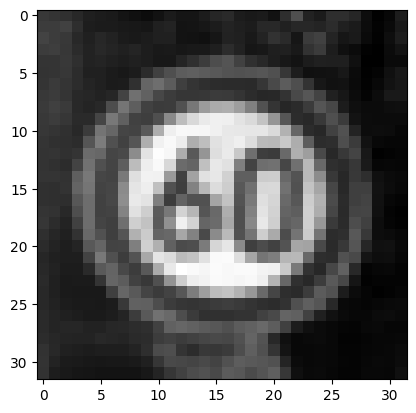

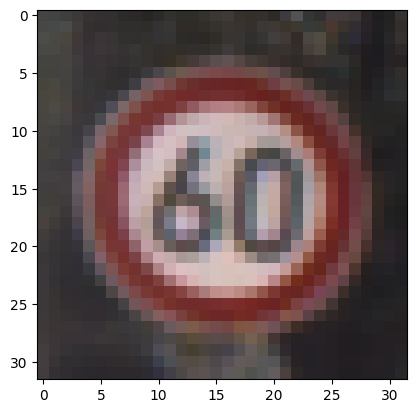

In [34]:
i = 600
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])


In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [37]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())
cnn_model.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation = 'relu'))
cnn_model.add(Dense(units=84, activation = 'relu'))
cnn_model.add(Dense(units=43, activation = 'softmax'))

In [38]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])

In [41]:
history = cnn_model.fit(x_train_gray_norm, y_train, batch_size=500, epochs=5, verbose=1, validation_data=(x_valid_gray_norm,y_validation))

Epoch 1/5
70/70 [==============================] - 8s 111ms/step - loss: 0.3969 - accuracy: 0.8936 - val_loss: 0.6594 - val_accuracy: 0.8152
Epoch 2/5
70/70 [==============================] - 8s 116ms/step - loss: 0.3390 - accuracy: 0.9098 - val_loss: 0.6379 - val_accuracy: 0.8252
Epoch 3/5
70/70 [==============================] - 8s 114ms/step - loss: 0.2897 - accuracy: 0.9248 - val_loss: 0.6382 - val_accuracy: 0.8202
Epoch 4/5
70/70 [==============================] - 8s 114ms/step - loss: 0.2566 - accuracy: 0.9350 - val_loss: 0.5813 - val_accuracy: 0.8415
Epoch 5/5
70/70 [==============================] - 8s 118ms/step - loss: 0.2298 - accuracy: 0.9400 - val_loss: 0.5976 - val_accuracy: 0.8340


In [42]:
#Evaluate the model
score = cnn_model.evaluate(x_test_gray_norm, y_test)
print('Test accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 4ms/step - loss: 0.9005 - accuracy: 0.8220
Test accuracy: 0.8220111131668091


In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

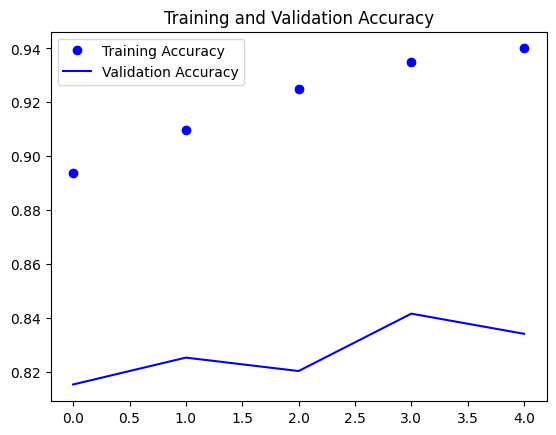

In [47]:
epoch = range(len(accuracy))

plt.plot(epoch, accuracy, 'bo', label='Training Accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

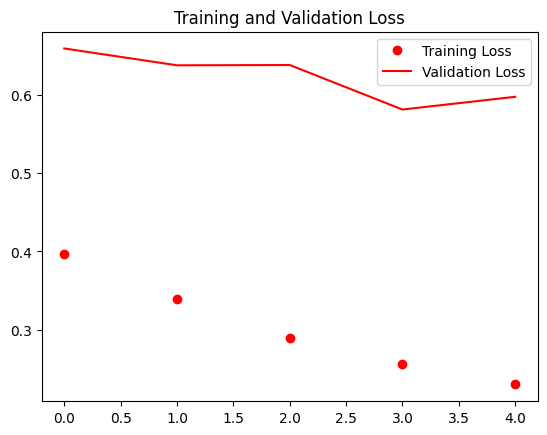

In [48]:
plt.plot(epoch, loss, 'ro', label='Training Loss')
plt.plot(epoch, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [55]:
predicted_classes = np.argmax(cnn_model.predict(x_test_gray_norm), axis=1)
y_true = y_test

395/395 [==============================] - 2s 5ms/step


<AxesSubplot: >

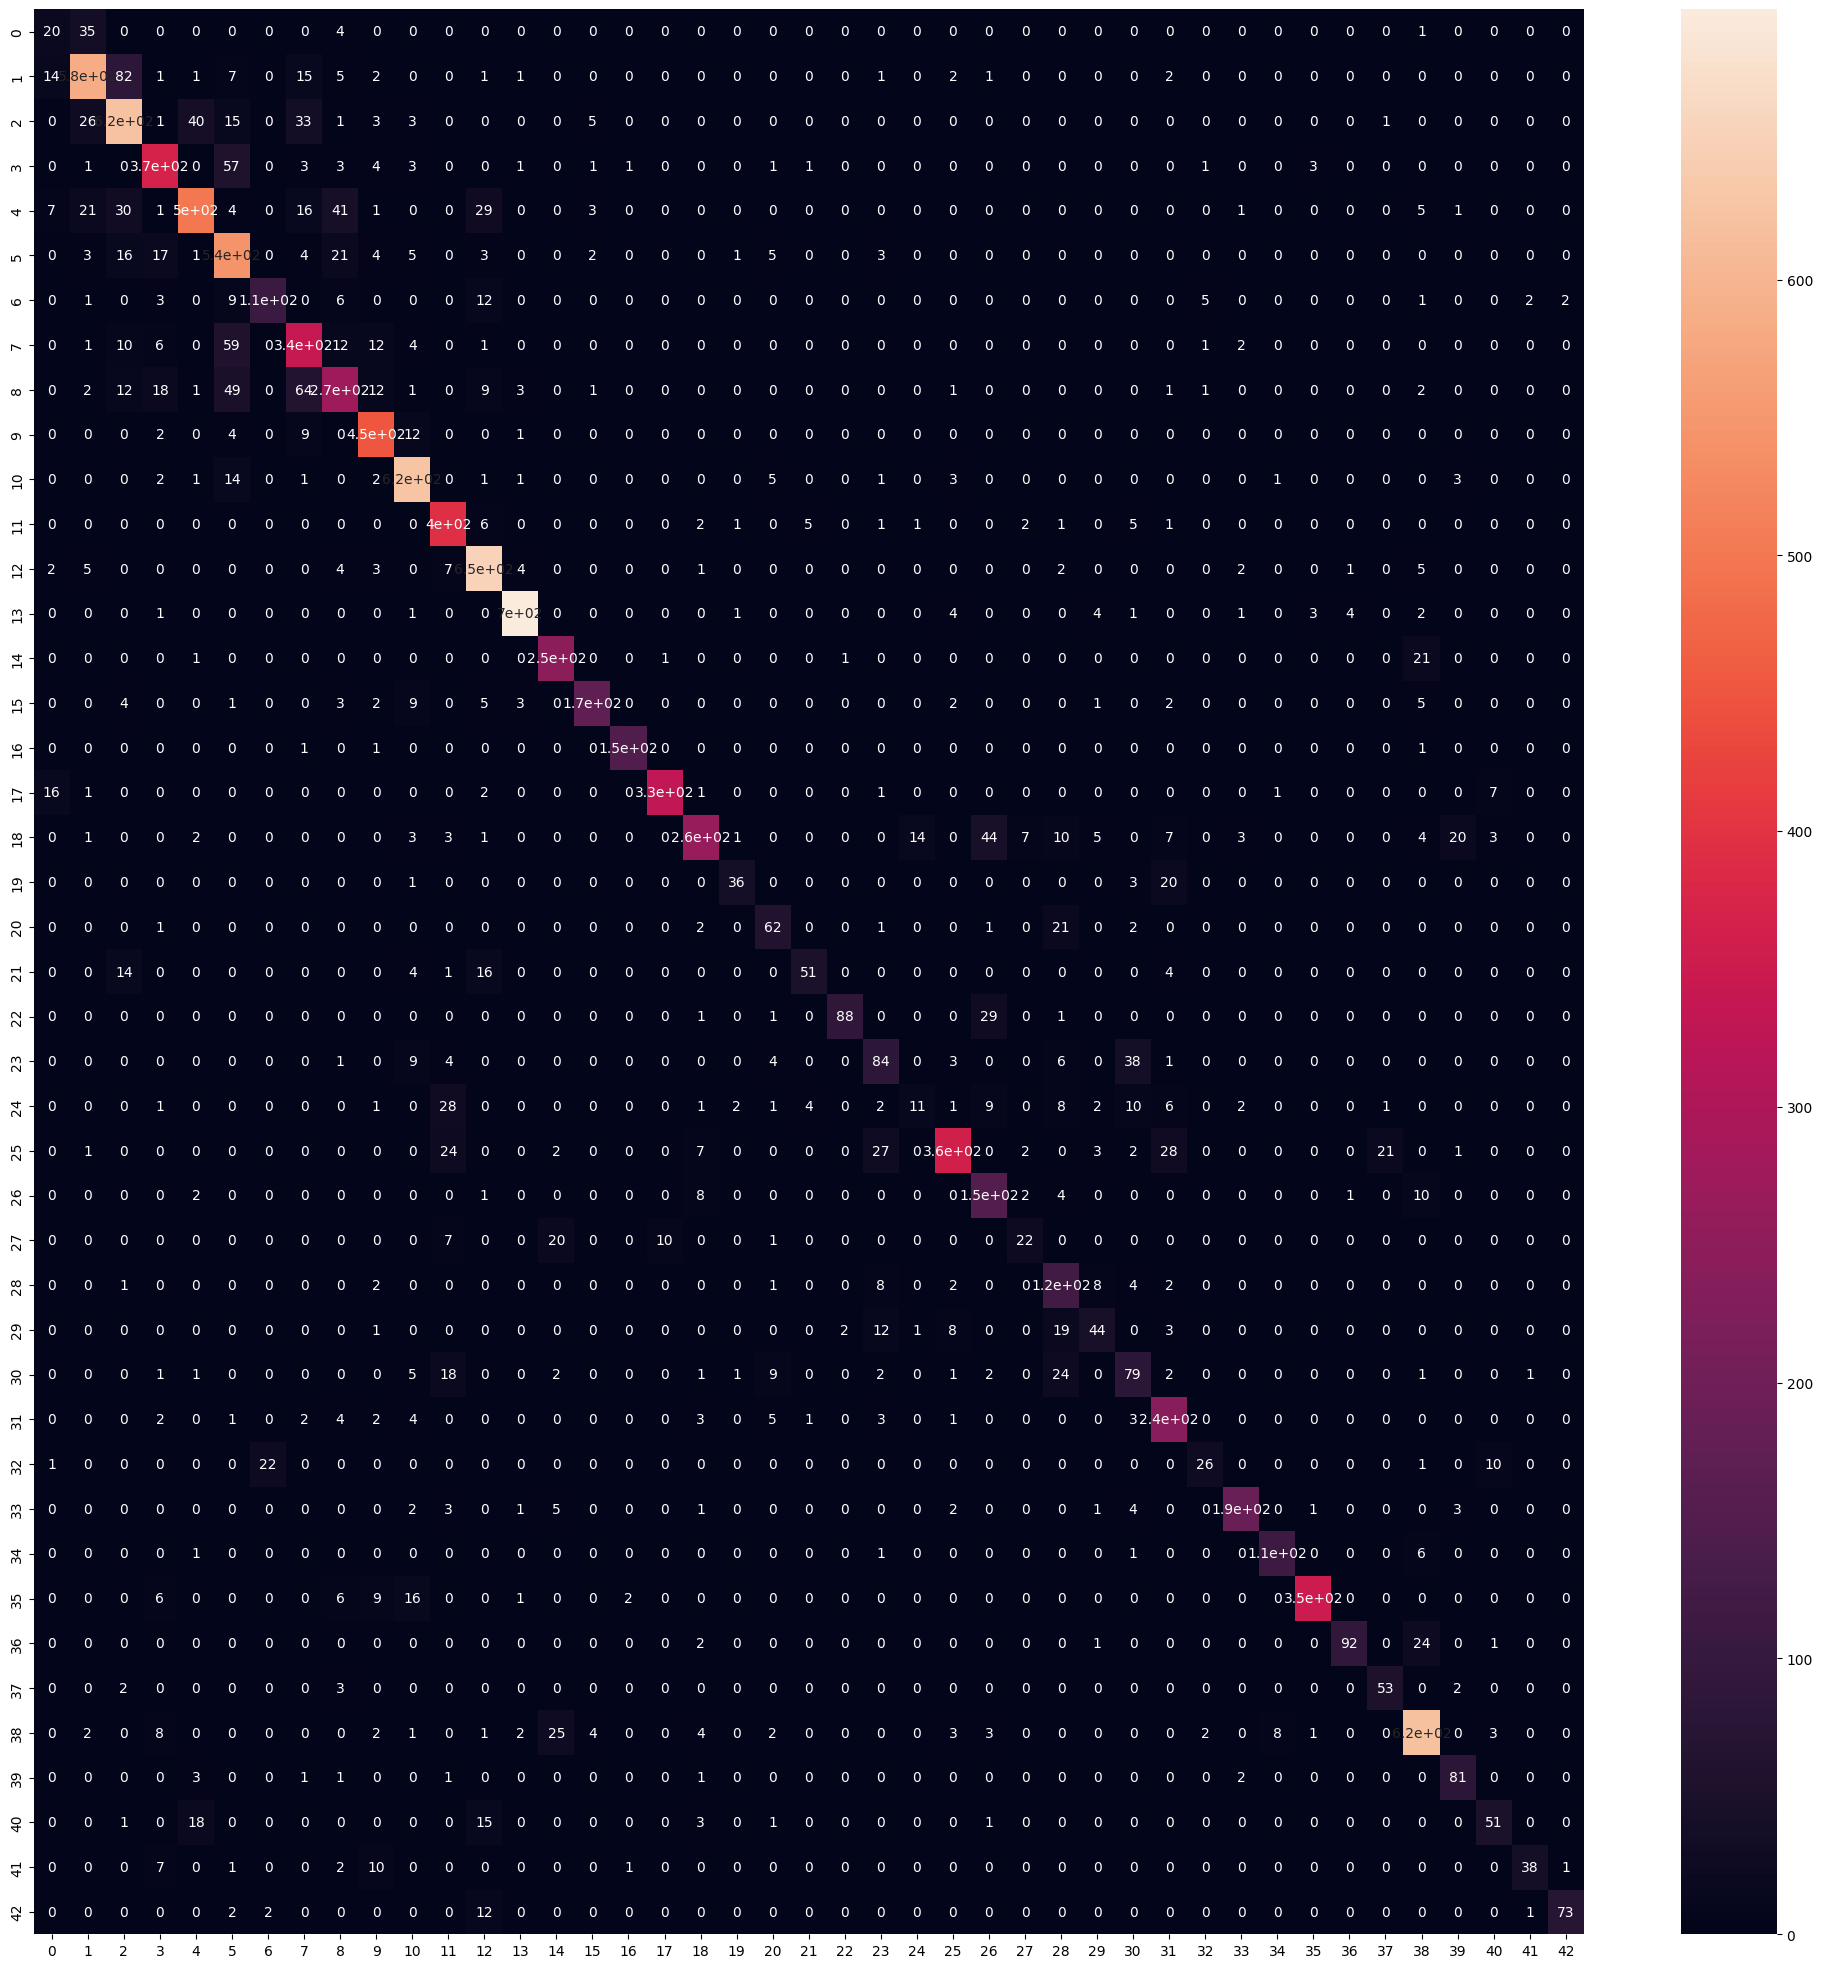

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true , y_pred=predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)

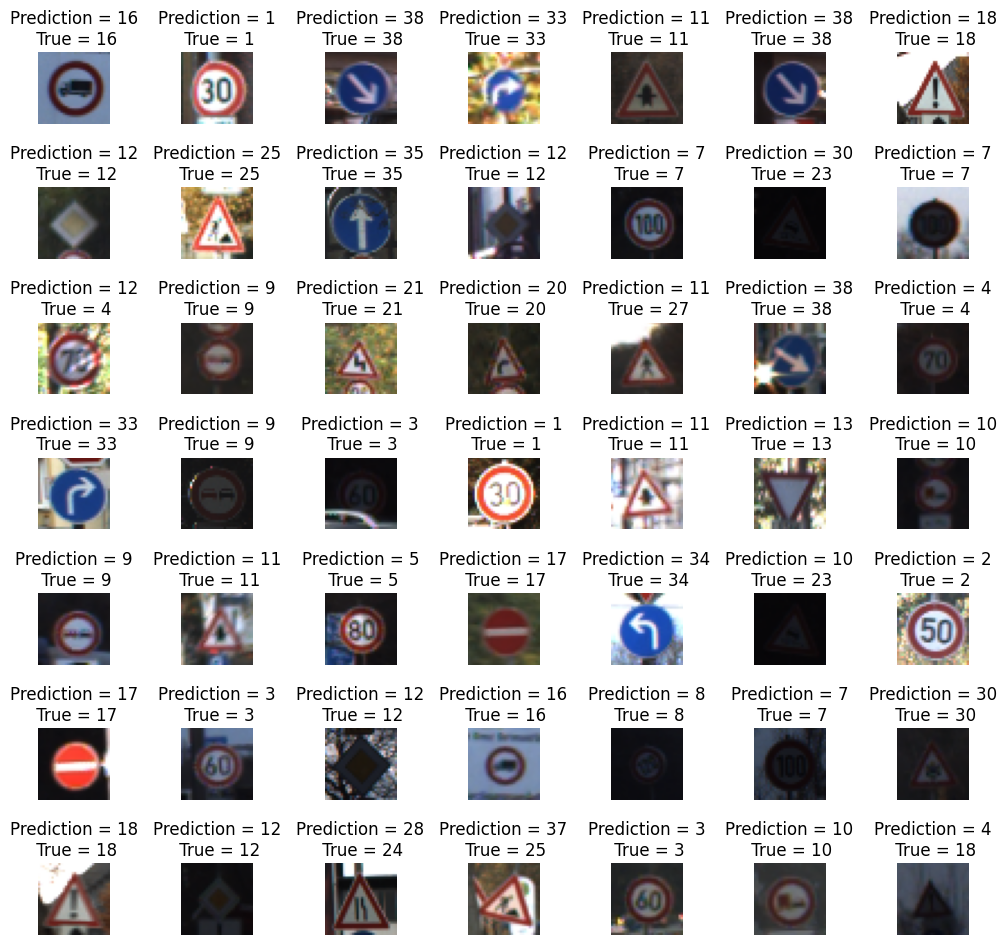

In [61]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel()

for i in range(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)